In [13]:
from google.colab import drive
drive.mount('/content/drive')
#!ls drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!pip3 install torch
#!pip3 install torchvision

In [5]:
# 
!tar -xvf "/content/drive/My Drive/VOCtrainval_06-Nov-2007.tar"

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000005.xml
VOCdevkit/VOC2007/Annotations/000007.xml
VOCdevkit/VOC2007/Annotations/000009.xml
VOCdevkit/VOC2007/Annotations/000012.xml
VOCdevkit/VOC2007/Annotations/000016.xml
VOCdevkit/VOC2007/Annotations/000017.xml
VOCdevkit/VOC2007/Annotations/000019.xml
VOCdevkit/VOC2007/Annotations/000020.xml
VOCdevkit/VOC2007/Annotations/000021.xml
VOCdevkit/VOC2007/Annotations/000023.xml
VOCdevkit/VOC2007/Annotations/000024.xml
VOCdevkit/VOC2007/Annotations/000026.xml
VOCdevkit/VOC2007/Annotations/000030.xml
VOCdevkit/VOC2007/Annotations/000032.xml
VOCdevkit/VOC2007/Annotations/000033.xml
VOCdevkit/VOC2007/Annotations/000034.xml
VOCdevkit/VOC2007/Annotations/000035.xml
VOCdevkit/VOC2007/Annotations/000036.xml
VOCdevkit/VOC2007/Annotations/000039.xml
VOCdevkit/VOC2007/Annotations/000041.xml
VOCdevkit/VOC2007/Annotations/000042.xml
VOCdevkit/VOC2007/Annotations/000044.xml
VOCdevkit/VOC2007/Annotations/000046.

In [23]:
import os
os.listdir("/content/VOCdevkit/VOC2007/")

['SegmentationObject',
 'Annotations',
 'JPEGImages',
 'ImageSets',
 'SegmentationClass']

In [0]:
import os

def get_idx_name(path):
  idx = os.listdir(path)
  idx_name = []
  for i in range(len(idx)):
    idx_name.append(os.path.splitext(idx[i])[0])
  return idx_name

In [0]:
img_path = "/content/VOCdevkit/VOC2007/JPEGImages"
mask_path = "/content/VOCdevkit/VOC2007/SegmentationObject"

In [26]:
img_idx = get_idx_name("/content/VOCdevkit/VOC2007/JPEGImages")
mask_idx = get_idx_name("/content/VOCdevkit/VOC2007/SegmentationObject")
print(len(img_idx), img_idx[:3])
print(len(mask_idx), mask_idx[:3])

5011 ['006473', '008023', '009659']
422 ['000661', '005859', '009950']


In [41]:
img_has_mask_idx = set(img_idx) & set(mask_idx)
img_has_mask_idx = list(img_has_mask_idx)

print(len(img_has_mask_idx), sorted(img_has_mask_idx)[:3])
print(len(mask_idx), sorted(mask_idx)[:3])

422 ['000032', '000033', '000039']
422 ['000032', '000033', '000039']


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

%matplotlib inline

from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [0]:
# https://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/2
!pip install --no-cache-dir -I pillow

In [47]:
train_df = pd.DataFrame()
train_df["images"] = [np.array(load_img(img_path + "/{}.jpg".format(idx))) / 255 for idx in sorted(img_has_mask_idx)[:100]]
train_df["masks"] = [np.array(load_img(mask_path + "/{}.png".format(idx), color_mode="grayscale")) / 255 for idx in sorted(mask_idx)[:100]]
print(train_df.shape)
train_df.head()

(100, 2)


,images,masks
0,"[[[0.5137254901960784, 0.7568627450980392, 0.8...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[[0.8666666666666667, 0.8666666666666667, 0.8...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[[0.6431372549019608, 0.6470588235294118, 0.5...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[[0.9058823529411765, 0.9058823529411765, 0.9...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[[0.9607843137254902, 0.9607843137254902, 0.9...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [48]:
train_df.images[0].shape, train_df.masks[0].shape

((281, 500, 3), (281, 500))

In [0]:
from skimage.transform import resize

img_size_ori = train_df.images[0].shape[0]
img_size_target = 101

def upsample(img):# not used
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_target, img_size_target), mode='constant', preserve_range=True)
    
def downsample(img):# not used
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_ori, img_size_ori), mode='constant', preserve_range=True)

In [50]:
img_resize = downsample(train_df.images[0])
msk_resize = downsample(train_df.masks[0])

img_resize.shape, msk_resize.shape

((281, 281, 3), (281, 281))

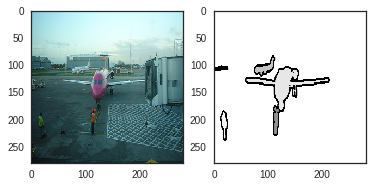

In [51]:
plt.subplot(1, 2, 1)
plt.imshow(img_resize)

plt.subplot(1, 2, 2)
plt.imshow(msk_resize)